In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pickle
# import nibabel as nib

In [2]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

# Load prepared data

In [3]:
dir_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/"
# dir_path = "/Users/mriworkshop/Documents/TDCS/code/tdcs_thesis/"
save_path = dir_path+"data/raw/"
img_path =  dir_path+"data/processed/"
model_path = dir_path+"models/"

## fmap mean all experiments

In [4]:
file_cylinder = save_path+"fmap_mean_neg_amp_32to39.txt"
file_sphere = save_path+"fmap_mean_neg_amp_42.txt"

columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'amp', 'neg', 'mean0', 'mean1', 'mean2', 'theory']
data_c = np.loadtxt(file_cylinder);
data_s = np.loadtxt(file_sphere);

In [6]:
df_c = pd.DataFrame(data_c, columns=columns_mean)
df_c = df_c.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int, "amp":int, "neg": int})
df_c

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory
0,32,1,0,0,0,2,0,0.0,0.0,0.0,0.0
1,32,1,0,0,1,2,0,0.0,0.0,0.0,0.0
2,32,1,0,0,2,2,0,0.0,0.0,0.0,0.0
3,32,1,0,0,3,2,0,0.0,0.0,0.0,0.0
4,32,1,0,0,4,2,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
12255227,39,6,43,63,59,1,1,0.0,0.0,0.0,0.0
12255228,39,6,43,63,60,1,1,0.0,0.0,0.0,0.0
12255229,39,6,43,63,61,1,1,0.0,0.0,0.0,0.0
12255230,39,6,43,63,62,1,1,0.0,0.0,0.0,0.0


In [7]:
df_s = pd.DataFrame(data_s, columns=columns_mean)
df_s = df_s.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int, "amp":int, "neg": int})
df_s

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory
0,42,1,0,0,0,2,0,0.0,0.0,0.0,0.578396
1,42,1,0,0,1,2,0,0.0,0.0,0.0,0.584610
2,42,1,0,0,2,2,0,0.0,0.0,0.0,0.590888
3,42,1,0,0,3,2,0,0.0,0.0,0.0,0.597230
4,42,1,0,0,4,2,0,0.0,0.0,0.0,0.603638
...,...,...,...,...,...,...,...,...,...,...,...
1081339,42,3,43,63,59,2,1,0.0,0.0,0.0,1.865481
1081340,42,3,43,63,60,2,1,0.0,0.0,0.0,1.910840
1081341,42,3,43,63,61,2,1,0.0,0.0,0.0,1.957465
1081342,42,3,43,63,62,2,1,0.0,0.0,0.0,2.005388


In [12]:
df = pd.concat([df_c, df_s], ignore_index=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13336576 entries, 0 to 13336575
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   amp       int64  
 6   neg       int64  
 7   mean0     float64
 8   mean1     float64
 9   mean2     float64
 10  theory    float64
dtypes: float64(4), int64(7)
memory usage: 1.1 GB


# Split data

## Data 1. fmap mean all experiments

In [15]:
df1_train = df[~((df['exp']==42) & ((df['mini_exp']==2) | (df['mini_exp']==3))) & ~((df['exp']==36) & ((df['mini_exp']==5) | (df['mini_exp']==6)))]
df1_val =  df[((df['exp']==42) & (df['mini_exp']==2)) | (df['exp']==36) & (df['mini_exp']==5)]
df1_test =  df[((df['exp']==42) & (df['mini_exp']==3)) | (df['exp']==36) & (df['mini_exp']==6)]

In [16]:
print(df1_train.shape)
print(df1_val.shape)
print(df1_test.shape)

(11894784, 11)
(720896, 11)
(720896, 11)


In [19]:
df1_train.iloc[:, 6:-1]

,neg,mean0,mean1,mean2
0,0,0.0,0.0,0.0
1,0,0.0,0.0,0.0
2,0,0.0,0.0,0.0
3,0,0.0,0.0,0.0
4,0,0.0,0.0,0.0
...,...,...,...,...
12615675,1,0.0,0.0,0.0
12615676,1,0.0,0.0,0.0
12615677,1,0.0,0.0,0.0
12615678,1,0.0,0.0,0.0


In [21]:
X1_train = df1_train.iloc[:, 6:-1].values 
y1_train = df1_train['theory'].values

X1_test = df1_val.iloc[:, 6:-1].values 
y1_test = df1_val['theory'].values

X1_pred = df1_test.iloc[:, 6:-1].values 
y1_pred = df1_val['theory'].values

In [22]:
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)
print(X1_pred.shape)
print(y1_pred.shape)

(11894784, 4)
(11894784,)
(720896, 4)
(720896,)
(720896, 4)
(720896,)


## Data4: None zero

In [25]:
df_nonzero = df[(df['mean0']!=0.0) & (df['mean1']!=0.0) & (df['mean2']!=0.0)]

In [26]:
df_nonzero

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory
26572,32,1,6,31,12,2,0,-938.799683,-948.025818,-957.294250,2.563399
26573,32,1,6,31,13,2,0,-869.659546,-878.644653,-889.680359,2.756330
26574,32,1,6,31,14,2,0,-758.812622,-766.461914,-778.177979,2.966980
26575,32,1,6,31,15,2,0,-644.983826,-651.566284,-664.997986,3.197531
26576,32,1,6,31,16,2,0,-522.547424,-530.130432,-542.555176,3.450627
...,...,...,...,...,...,...,...,...,...,...,...
13322144,42,3,40,30,32,2,1,531.209412,524.617249,528.361572,1.120325
13322197,42,3,40,31,21,2,1,-738.791687,-309.708313,248.529739,0.942770
13322198,42,3,40,31,22,2,1,-854.326355,-827.500061,-840.415222,0.957650
13322260,42,3,40,32,20,2,1,-524.266296,-949.864380,-932.718628,0.927170


In [81]:
df4_train = df_nonzero[~((df_nonzero['exp']==42) & ((df_nonzero['mini_exp']==2) | (df_nonzero['mini_exp']==3))) & ~((df_nonzero['exp']==36) & ((df_nonzero['mini_exp']==5) | (df_nonzero['mini_exp']==6)))]
df4_test =  df_nonzero[((df_nonzero['exp']==42) & (df_nonzero['mini_exp']==2)) | ((df_nonzero['exp']==36) & (df_nonzero['mini_exp']==5))]
df4_pred1 =  df_nonzero[((df_nonzero['exp']==42) & (df_nonzero['mini_exp']==3))]
df4_pred2 =  df_nonzero[((df_nonzero['exp']==36) & (df_nonzero['mini_exp']==6))]

In [82]:
X4_train = df4_train.iloc[:, 6:-1].values
y4_train = df4_train['theory'].values

X4_test = df4_test.iloc[:, 6:-1].values
y4_test = df4_test['theory'].values

X4_pred1 = df4_pred1.iloc[:, 6:-1].values
y4_pred1 = df4_pred1['theory'].values

X4_pred2 = df4_pred2.iloc[:, 6:-1].values
y4_pred2 = df4_pred2['theory'].values

In [83]:
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)
print(y4_test.shape)
print(X4_pred1.shape)
print(y4_pred1.shape)
print(X4_pred2.shape)
print(y4_pred2.shape)

(2218526, 4)
(2218526,)
(122280, 4)
(122280,)
(54256, 4)
(54256,)
(68026, 4)
(68026,)


# Run NN

In [53]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test

In [54]:
shape = (len(X_train[0]),)
model = keras.Sequential()
model.add(Dense(5, activation='relu', input_shape=shape)) 
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='RMSprop', loss='mse', metrics=["accuracy"])

In [55]:
checkpointer = ModelCheckpoint(model_path+'best_model_nn_neg.h5', verbose=1, save_best_only=True)

In [56]:
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=[X_test, y_test], callbacks=[checkpointer])

Epoch 1/300
360439/360448 [============================>.] - ETA: 0s - loss: 2626.2849 - accuracy: 0.7654
Epoch 1: val_loss improved from inf to 21.85946, saving model to /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/models/best_model_nn_neg_norm.h5
360448/360448 [==============================] - 370s 1ms/step - loss: 2626.2195 - accuracy: 0.7654 - val_loss: 21.8595 - val_accuracy: 0.8112
Epoch 2/300
360426/360448 [============================>.] - ETA: 0s - loss: 2621.2356 - accuracy: 0.7302
Epoch 2: val_loss improved from 21.85946 to 20.61890, saving model to /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/models/best_model_nn_neg_norm.h5
360448/360448 [==============================] - 387s 1ms/step - loss: 2621.0784 - accuracy: 0.7302 - val_loss: 20.6189 - val_accuracy: 0.8114
Epoch 3/300
360429/360448 [============================>.] - ETA: 0s - loss: 2621.6799 - accuracy: 0.7387
Epoch 3: val_loss improved from 20.61890 to 18.55254, saving model to /Users/chikakoo

Epoch 26/300
360439/360448 [============================>.] - ETA: 0s - loss: 2620.0681 - accuracy: 0.7048
Epoch 26: val_loss did not improve from 14.12867
360448/360448 [==============================] - 343s 953us/step - loss: 2620.0027 - accuracy: 0.7048 - val_loss: 21.7032 - val_accuracy: 0.8112
Epoch 27/300
360403/360448 [============================>.] - ETA: 0s - loss: 2620.7729 - accuracy: 0.7177
Epoch 27: val_loss did not improve from 14.12867
360448/360448 [==============================] - 343s 952us/step - loss: 2620.4470 - accuracy: 0.7176 - val_loss: 20.4090 - val_accuracy: 0.8114
Epoch 28/300
360401/360448 [============================>.] - ETA: 0s - loss: 2620.2585 - accuracy: 0.7103
Epoch 28: val_loss did not improve from 14.12867
360448/360448 [==============================] - 344s 953us/step - loss: 2619.9180 - accuracy: 0.7103 - val_loss: 16.9250 - val_accuracy: 0.8114
Epoch 29/300
360400/360448 [============================>.] - ETA: 0s - loss: 2620.1257 - accurac

KeyboardInterrupt: 

In [ ]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
np.corrcoef(test_pred.flatten(), y_test)

In [ ]:
model.summary()

In [ ]:
history.history

## Plot

### Loss function (MSE)

In [ ]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

In [ ]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

# Output data

# Run NN for NonZero

In [33]:
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

In [34]:
shape = (len(X_train[0]),)
model = keras.Sequential()
model.add(Dense(5, activation='relu', input_shape=shape)) 
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='RMSprop', loss='mse', metrics=["mse"])

2023-04-06 16:14:30.156752: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [58]:
checkpointer = ModelCheckpoint(model_path+'best_model_nn_neg_both_nonzero2.h5', verbose=1, save_best_only=True)

In [59]:
history = model.fit(X_train, y_train, epochs=300, batch_size=64, validation_data=[X_test, y_test], callbacks=[checkpointer])

Epoch 1/300
34661/34665 [============================>.] - ETA: 0s - loss: 13586.1553 - mse: 13586.1553
Epoch 1: val_loss improved from inf to 59.46264, saving model to /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/models/best_model_nn_neg_both_nonzero2.h5
34665/34665 [==============================] - 33s 947us/step - loss: 13584.7998 - mse: 13584.7998 - val_loss: 59.4626 - val_mse: 59.4626
Epoch 2/300
34618/34665 [============================>.] - ETA: 0s - loss: 13602.9141 - mse: 13602.9141
Epoch 2: val_loss improved from 59.46264 to 57.20226, saving model to /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/models/best_model_nn_neg_both_nonzero2.h5
34665/34665 [==============================] - 33s 955us/step - loss: 13584.9287 - mse: 13584.9287 - val_loss: 57.2023 - val_mse: 57.2023
Epoch 3/300
34612/34665 [============================>.] - ETA: 0s - loss: 13602.8701 - mse: 13602.8701
Epoch 3: val_loss did not improve from 57.20226
34665/34665 [======================

34665/34665 [==============================] - 33s 945us/step - loss: 13582.6680 - mse: 13582.6680 - val_loss: 57.2203 - val_mse: 57.2203
Epoch 28/300
34637/34665 [============================>.] - ETA: 0s - loss: 13591.4258 - mse: 13591.4258
Epoch 28: val_loss did not improve from 55.82032
34665/34665 [==============================] - 33s 938us/step - loss: 13580.7188 - mse: 13580.7188 - val_loss: 58.2697 - val_mse: 58.2697
Epoch 29/300
34647/34665 [============================>.] - ETA: 0s - loss: 13589.8584 - mse: 13589.8584
Epoch 29: val_loss did not improve from 55.82032
34665/34665 [==============================] - 33s 943us/step - loss: 13583.0410 - mse: 13583.0410 - val_loss: 56.8333 - val_mse: 56.8333
Epoch 30/300
34620/34665 [============================>.] - ETA: 0s - loss: 13599.8027 - mse: 13599.8027
Epoch 30: val_loss did not improve from 55.82032
34665/34665 [==============================] - 32s 934us/step - loss: 13582.9707 - mse: 13582.9707 - val_loss: 57.1114 - val

Epoch 55/300
34632/34665 [============================>.] - ETA: 0s - loss: 13592.2432 - mse: 13592.2432
Epoch 55: val_loss did not improve from 55.29700
34665/34665 [==============================] - 31s 908us/step - loss: 13579.6035 - mse: 13579.6035 - val_loss: 59.6073 - val_mse: 59.6073
Epoch 56/300
34634/34665 [============================>.] - ETA: 0s - loss: 13586.7363 - mse: 13586.7363
Epoch 56: val_loss did not improve from 55.29700
34665/34665 [==============================] - 31s 906us/step - loss: 13578.9727 - mse: 13578.9727 - val_loss: 57.5890 - val_mse: 57.5890
Epoch 57/300
34654/34665 [============================>.] - ETA: 0s - loss: 13584.4004 - mse: 13584.4004
Epoch 57: val_loss did not improve from 55.29700
34665/34665 [==============================] - 31s 900us/step - loss: 13580.3154 - mse: 13580.3154 - val_loss: 59.6397 - val_mse: 59.6397
Epoch 58/300
34611/34665 [============================>.] - ETA: 0s - loss: 13601.4365 - mse: 13601.4365
Epoch 58: val_loss 

34621/34665 [============================>.] - ETA: 0s - loss: 13598.3301 - mse: 13598.3301
Epoch 82: val_loss did not improve from 54.16714
34665/34665 [==============================] - 31s 898us/step - loss: 13581.8584 - mse: 13581.8584 - val_loss: 65.2830 - val_mse: 65.2830
Epoch 83/300
34648/34665 [============================>.] - ETA: 0s - loss: 13585.6328 - mse: 13585.6328
Epoch 83: val_loss did not improve from 54.16714
34665/34665 [==============================] - 31s 903us/step - loss: 13579.2744 - mse: 13579.2744 - val_loss: 56.8596 - val_mse: 56.8596
Epoch 84/300
34619/34665 [============================>.] - ETA: 0s - loss: 13596.9443 - mse: 13596.9443
Epoch 84: val_loss did not improve from 54.16714
34665/34665 [==============================] - 31s 897us/step - loss: 13579.5713 - mse: 13579.5713 - val_loss: 57.8565 - val_mse: 57.8565
Epoch 85/300
34621/34665 [============================>.] - ETA: 0s - loss: 13597.3379 - mse: 13597.3379
Epoch 85: val_loss did not impro

Epoch 110/300
34644/34665 [============================>.] - ETA: 0s - loss: 13588.7773 - mse: 13588.7773
Epoch 110: val_loss did not improve from 53.95003
34665/34665 [==============================] - 34s 992us/step - loss: 13581.1299 - mse: 13581.1299 - val_loss: 56.8352 - val_mse: 56.8352
Epoch 111/300
34628/34665 [============================>.] - ETA: 0s - loss: 13594.7539 - mse: 13594.7539
Epoch 111: val_loss did not improve from 53.95003
34665/34665 [==============================] - 35s 999us/step - loss: 13580.5781 - mse: 13580.5781 - val_loss: 65.4792 - val_mse: 65.4792
Epoch 112/300
34620/34665 [============================>.] - ETA: 0s - loss: 13594.8779 - mse: 13594.8779
Epoch 112: val_loss did not improve from 53.95003
34665/34665 [==============================] - 35s 1ms/step - loss: 13577.6289 - mse: 13577.6289 - val_loss: 57.3643 - val_mse: 57.3643
Epoch 113/300
34658/34665 [============================>.] - ETA: 0s - loss: 13582.4639 - mse: 13582.4639
Epoch 113: val

Epoch 138/300
34622/34665 [============================>.] - ETA: 0s - loss: 13591.2129 - mse: 13591.2129
Epoch 138: val_loss did not improve from 53.95003
34665/34665 [==============================] - 31s 892us/step - loss: 13579.1367 - mse: 13579.1367 - val_loss: 57.1493 - val_mse: 57.1493
Epoch 139/300
34654/34665 [============================>.] - ETA: 0s - loss: 13582.8096 - mse: 13582.8096
Epoch 139: val_loss did not improve from 53.95003
34665/34665 [==============================] - 31s 891us/step - loss: 13578.8633 - mse: 13578.8633 - val_loss: 61.6878 - val_mse: 61.6878
Epoch 140/300
34613/34665 [============================>.] - ETA: 0s - loss: 13597.8916 - mse: 13597.8916
Epoch 140: val_loss did not improve from 53.95003
34665/34665 [==============================] - 32s 913us/step - loss: 13577.8701 - mse: 13577.8701 - val_loss: 56.6331 - val_mse: 56.6331
Epoch 141/300
34652/34665 [============================>.] - ETA: 0s - loss: 13585.0879 - mse: 13585.0879
Epoch 141: v

Epoch 166/300
34625/34665 [============================>.] - ETA: 0s - loss: 13591.7207 - mse: 13591.7207
Epoch 166: val_loss did not improve from 53.95003
34665/34665 [==============================] - 31s 893us/step - loss: 13576.5928 - mse: 13576.5928 - val_loss: 56.0911 - val_mse: 56.0911
Epoch 167/300
34641/34665 [============================>.] - ETA: 0s - loss: 13588.6416 - mse: 13588.6416
Epoch 167: val_loss did not improve from 53.95003
34665/34665 [==============================] - 31s 905us/step - loss: 13579.5371 - mse: 13579.5371 - val_loss: 62.0115 - val_mse: 62.0115
Epoch 168/300
34624/34665 [============================>.] - ETA: 0s - loss: 13593.3193 - mse: 13593.3193
Epoch 168: val_loss did not improve from 53.95003
34665/34665 [==============================] - 31s 892us/step - loss: 13577.6689 - mse: 13577.6689 - val_loss: 56.7862 - val_mse: 56.7862
Epoch 169/300
34639/34665 [============================>.] - ETA: 0s - loss: 13589.1035 - mse: 13589.1035
Epoch 169: v

34665/34665 [==============================] - 31s 892us/step - loss: 13576.9453 - mse: 13576.9453 - val_loss: 59.4115 - val_mse: 59.4115
Epoch 194/300
34622/34665 [============================>.] - ETA: 0s - loss: 13591.7754 - mse: 13591.7754
Epoch 194: val_loss did not improve from 53.75972
34665/34665 [==============================] - 31s 893us/step - loss: 13575.2207 - mse: 13575.2207 - val_loss: 58.2065 - val_mse: 58.2065
Epoch 195/300
34651/34665 [============================>.] - ETA: 0s - loss: 12540.4766 - mse: 12540.4766
Epoch 195: val_loss did not improve from 53.75972
34665/34665 [==============================] - 31s 898us/step - loss: 13575.9727 - mse: 13575.9727 - val_loss: 62.1673 - val_mse: 62.1673
Epoch 196/300
34608/34665 [============================>.] - ETA: 0s - loss: 13599.4795 - mse: 13599.4795
Epoch 196: val_loss did not improve from 53.75972
34665/34665 [==============================] - 31s 894us/step - loss: 13577.5811 - mse: 13577.5811 - val_loss: 54.6978

34665/34665 [==============================] - 31s 898us/step - loss: 13579.7568 - mse: 13579.7568 - val_loss: 56.4185 - val_mse: 56.4185
Epoch 222/300
34659/34665 [============================>.] - ETA: 0s - loss: 13581.1230 - mse: 13581.1230
Epoch 222: val_loss did not improve from 53.75972
34665/34665 [==============================] - 31s 893us/step - loss: 13579.2334 - mse: 13579.2334 - val_loss: 54.3425 - val_mse: 54.3425
Epoch 223/300
34661/34665 [============================>.] - ETA: 0s - loss: 13578.5703 - mse: 13578.5703
Epoch 223: val_loss did not improve from 53.75972
34665/34665 [==============================] - 31s 901us/step - loss: 13577.2197 - mse: 13577.2197 - val_loss: 60.9812 - val_mse: 60.9812
Epoch 224/300
34664/34665 [============================>.] - ETA: 0s - loss: 13576.9746 - mse: 13576.9746
Epoch 224: val_loss did not improve from 53.75972
34665/34665 [==============================] - 31s 893us/step - loss: 13576.7910 - mse: 13576.7910 - val_loss: 65.4646

34665/34665 [==============================] - 31s 898us/step - loss: 13574.6113 - mse: 13574.6113 - val_loss: 67.3373 - val_mse: 67.3373
Epoch 250/300
34640/34665 [============================>.] - ETA: 0s - loss: 13585.9287 - mse: 13585.9287
Epoch 250: val_loss did not improve from 53.75972
34665/34665 [==============================] - 31s 892us/step - loss: 13576.3760 - mse: 13576.3760 - val_loss: 58.0030 - val_mse: 58.0030
Epoch 251/300
34620/34665 [============================>.] - ETA: 0s - loss: 13592.4346 - mse: 13592.4346
Epoch 251: val_loss did not improve from 53.75972
34665/34665 [==============================] - 31s 896us/step - loss: 13575.9170 - mse: 13575.9170 - val_loss: 59.0430 - val_mse: 59.0430
Epoch 252/300
34631/34665 [============================>.] - ETA: 0s - loss: 13588.3975 - mse: 13588.3975
Epoch 252: val_loss did not improve from 53.75972
34665/34665 [==============================] - 31s 894us/step - loss: 13576.0195 - mse: 13576.0195 - val_loss: 58.0864

34665/34665 [==============================] - 31s 893us/step - loss: 13577.1826 - mse: 13577.1826 - val_loss: 57.1092 - val_mse: 57.1092
Epoch 278/300
34632/34665 [============================>.] - ETA: 0s - loss: 13588.6963 - mse: 13588.6963
Epoch 278: val_loss did not improve from 53.75972
34665/34665 [==============================] - 31s 890us/step - loss: 13576.1064 - mse: 13576.1064 - val_loss: 55.5960 - val_mse: 55.5960
Epoch 279/300
34653/34665 [============================>.] - ETA: 0s - loss: 13581.8154 - mse: 13581.8154
Epoch 279: val_loss did not improve from 53.75972
34665/34665 [==============================] - 31s 892us/step - loss: 13577.3340 - mse: 13577.3340 - val_loss: 61.8568 - val_mse: 61.8568
Epoch 280/300
34639/34665 [============================>.] - ETA: 0s - loss: 13540.8750 - mse: 13540.8750
Epoch 280: val_loss did not improve from 53.75972
34665/34665 [==============================] - 31s 892us/step - loss: 13576.4844 - mse: 13576.4844 - val_loss: 57.5083

In [60]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

69329/69329 [==============================] - 51s 732us/step
13570.304087545786
4243025614.7816515
3822/3822 [==============================] - 3s 732us/step
56.7188035192588
2.6219890237431023


In [61]:
model.evaluate(X_test, y_test)

3822/3822 [==============================] - 3s 870us/step - loss: 56.7189 - mse: 56.7189


[56.7188606262207, 56.7188606262207]

In [62]:
np.corrcoef(test_pred.flatten(), y_test)

array([[1.        , 0.82952596],
       [0.82952596, 1.        ]])

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [64]:
history.history

{'loss': [13584.7998046875,
  13584.9287109375,
  13582.64453125,
  13584.1650390625,
  13582.48046875,
  13583.0830078125,
  13581.46484375,
  13581.048828125,
  13583.0634765625,
  13582.65234375,
  13582.1064453125,
  13581.6123046875,
  13582.6591796875,
  13581.162109375,
  13582.6748046875,
  13580.28125,
  13578.423828125,
  13582.1435546875,
  13581.2900390625,
  13581.21875,
  13583.4736328125,
  13581.2666015625,
  13583.8330078125,
  13579.9208984375,
  13580.892578125,
  13581.0673828125,
  13582.66796875,
  13580.71875,
  13583.041015625,
  13582.970703125,
  13583.44921875,
  13582.3271484375,
  13579.6494140625,
  13580.6845703125,
  13580.5341796875,
  13582.3134765625,
  13578.9462890625,
  13582.408203125,
  13581.4609375,
  13581.65234375,
  13579.9111328125,
  13580.09375,
  13580.58984375,
  13577.6220703125,
  13581.3310546875,
  13581.7919921875,
  13581.0966796875,
  13579.8408203125,
  13580.88671875,
  13579.8564453125,
  13581.244140625,
  13577.888671875,
  

## Plot

### Loss function (MSE)

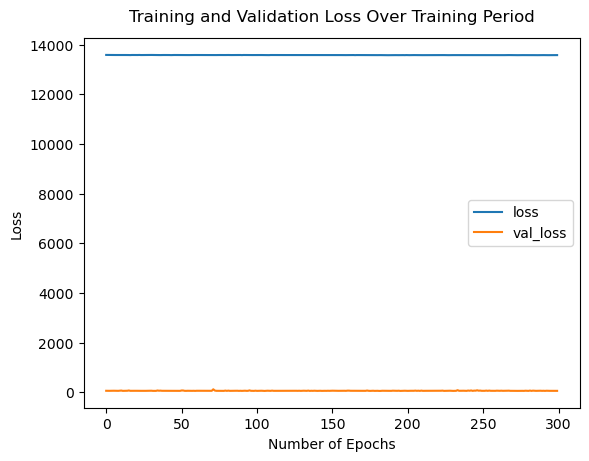

In [65]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

# Plot

### Theory vs Predict

In [115]:
X4_pred = X4_pred2
y4_pred = y4_pred2

In [116]:
test_pred = model.predict(X4_pred)

2126/2126 [==============================] - 1s 675us/step


r: 0.86658, st_er: 0.001315
y = 0.5956*x + 0.0381


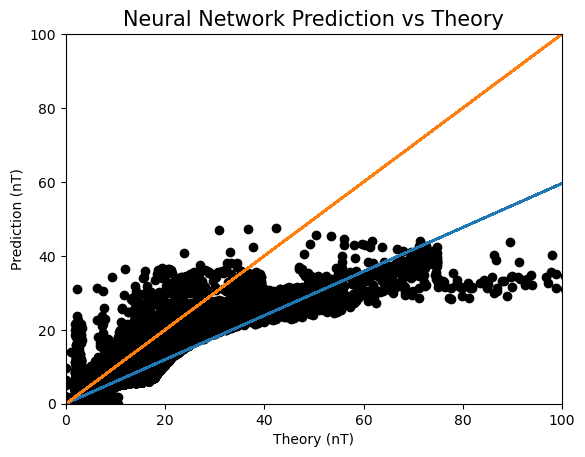

In [117]:
x = y4_pred.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y4_pred, test_pred,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [118]:
df_test = df1_test.loc[df1_test['exp']==36]
df4_pred = df4_pred2

In [119]:
df4_pred['predict'] = test_pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_15963/2364276288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_pred['predict'] = test_pred


In [120]:
df4_pred

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory,predict
5437480,36,6,7,32,40,2,0,-183.593781,-184.268631,-199.538742,4.988159,7.116714
5437481,36,6,7,32,41,2,0,-383.761566,-383.066467,-395.916077,4.591202,5.983032
5437482,36,6,7,32,42,2,0,-779.052185,-785.270813,-803.943787,4.237324,5.576271
5437483,36,6,7,32,43,2,0,-1017.557312,-1026.294189,-1037.133667,3.918999,5.165688
5437519,36,6,7,33,15,2,0,-1508.948120,-1513.032471,-1527.041992,3.371496,4.489059
...,...,...,...,...,...,...,...,...,...,...,...,...
5736792,36,6,36,37,24,2,1,-46.617607,-59.281792,-58.657875,-7.175758,-8.123253
5736803,36,6,36,37,35,2,1,151.715485,130.792816,139.797287,-8.527348,-14.865891
5736806,36,6,36,37,38,2,1,-115.256683,-131.555984,-127.650993,-6.039019,-10.395432
5736807,36,6,36,37,39,2,1,-253.580444,-268.104340,-266.388824,-5.501382,-6.579582


In [121]:
df_test['predict'] = 0.00

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_15963/3257651465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = 0.00


In [122]:
df_out = df_test[['i', 'j', 'k', 'neg', 'predict']]
df_pre = df4_pred[['i', 'j', 'k', 'neg', 'predict']]

In [123]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360448 entries, 5406720 to 5767167
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   i        360448 non-null  int64  
 1   j        360448 non-null  int64  
 2   k        360448 non-null  int64  
 3   neg      360448 non-null  int64  
 4   predict  360448 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 16.5 MB


In [124]:
for x in range(len(df_pre)):
    i = df_pre.iloc[x, :]['i'].astype(int)
    j = df_pre.iloc[x, :]['j'].astype(int)
    k = df_pre.iloc[x, :]['k'].astype(int)
    neg = df_pre.iloc[x, :]['neg'].astype(int)
    pred = df_pre.iloc[x, :]['predict']
    idx = df_out[(df_out['i']==i) & (df_out['j']==j) & (df_out['k']==k) & (df_out['neg']==neg)].index
    df_out.loc[idx, 'predict']= pred

In [125]:
df_pre

,i,j,k,neg,predict
5437480,7,32,40,0,7.116714
5437481,7,32,41,0,5.983032
5437482,7,32,42,0,5.576271
5437483,7,32,43,0,5.165688
5437519,7,33,15,0,4.489059
...,...,...,...,...,...
5736792,36,37,24,1,-8.123253
5736803,36,37,35,1,-14.865891
5736806,36,37,38,1,-10.395432
5736807,36,37,39,1,-6.579582


In [126]:
df_out[(df_out['i']==7) & (df_out['j']==32) & (df_out['k']==40)]

,i,j,k,neg,predict
5437480,7,32,40,0,7.116714
5617704,7,32,40,1,-7.892632


In [127]:
df_out

,i,j,k,neg,predict
5406720,0,0,0,0,0.0
5406721,0,0,1,0,0.0
5406722,0,0,2,0,0.0
5406723,0,0,3,0,0.0
5406724,0,0,4,0,0.0
...,...,...,...,...,...
5767163,43,63,59,1,0.0
5767164,43,63,60,1,0.0
5767165,43,63,61,1,0.0
5767166,43,63,62,1,0.0


In [128]:
df_pos = df_out[df_out['neg']==0]
df_neg = df_out[df_out['neg']==1]

In [129]:
df_pos

,i,j,k,neg,predict
5406720,0,0,0,0,0.0
5406721,0,0,1,0,0.0
5406722,0,0,2,0,0.0
5406723,0,0,3,0,0.0
5406724,0,0,4,0,0.0
...,...,...,...,...,...
5586939,43,63,59,0,0.0
5586940,43,63,60,0,0.0
5586941,43,63,61,0,0.0
5586942,43,63,62,0,0.0


In [114]:
np.savetxt(img_path+"nn_neg_both_nonzero_pos_300_sphere.txt", df_pos[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")
np.savetxt(img_path+"nn_neg_both_nonzero_neg_300_sphere.txt", df_neg[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [130]:
np.savetxt(img_path+"nn_neg_both_nonzero_pos_300_cyl.txt", df_pos[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")
np.savetxt(img_path+"nn_neg_both_nonzero_neg_300_cyl.txt", df_neg[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")